# Least Square Regression - Multi-Layer Case
## (for sine wave data)

# Library

In [2]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

# simple data

In [2]:
# true data
N = 100
X = np.linspace(-np.pi, np.pi, N).reshape(N, 1)
real_y = np.sin(X)

# add noise
y = real_y + 0.1*np.random.randn(N, 1)

# shuffle
idx = np.random.permutation(N)
X_ = X[idx]
y_ = y[idx]

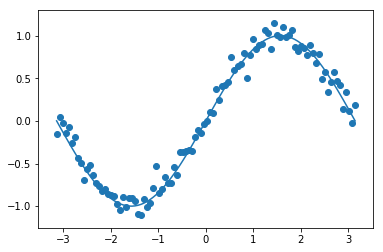

In [3]:
# show
plt.figure()
plt.plot(X, real_y)
plt.scatter(X, y)
plt.show()

# Split train / test dataset

In [4]:
n = N-20

X_train = X_[:n]
y_train = y_[:n]
X_test = X_[n:]
y_test = y_[n:]

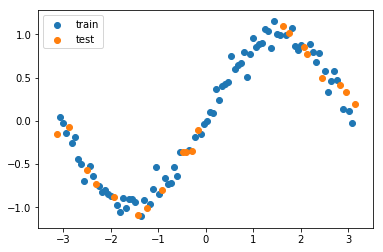

In [5]:
plt.figure()
plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.legend()
plt.show()

# Multi-layer Linear Regression

## Hyper parameter setting

In [3]:
learning_rate = 1e-1
training_epochs = 1000

## Skeleton code

In [4]:
tf.reset_default_graph()

# place holder
tf_X = tf.placeholder(tf.float32, [None,1])
tf_y = tf.placeholder(tf.float32, [None,1])


# variables
w1 = tf.get_variable('w1', [1,1])
b1 = tf.get_variable('b1', [1])

w2 = tf.get_variable('w2', [1,1])
b2 = tf.get_variable('b2', [1])


# model
output1 = tf_X @ w1 + b1
hidden1 = tf.nn.sigmoid(output1)
y_pred = hidden1 @ w2 + b2


# loss and optimizer
loss = tf.reduce_mean(tf.reduce_sum(tf.pow(tf_y - y_pred, 2), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
 

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [ ]:
with tf.Session() as sess:
    # init
    sess.run(tf.global_variables_initializer())
    
    # train
    for i in range(training_epochs):
        sess.run(optimizer, feed_dict={tf_X:X_train, tf_y:y_train})

    # result
    y_train_pred = sess.run(y_pred, feed_dict={tf_X:X_train})
    y_whole_pred = sess.run(y_pred, feed_dict={tf_X:X_})
    

## Make model with get_variable

In [ ]:
tf.reset_default_graph()

# place holder
tf_X = tf.placeholder(tf.float32, [None, 1])
tf_y = tf.placeholder(tf.float32, [None, 1])

# variables
w1 = tf.get_variable('w1', [1, 1])
b1 = tf.get_variable('b1', [1])
w2 = tf.get_variable('w2', [1, 1])
b2 = tf.get_variable('b2', [1])

# model
output1 = tf_X @ w1 + b1
hidden1 = tf.nn.sigmoid( output1 )
y_pred = hidden1 @ w2 + b2

# loss and optimizer
loss = tf.reduce_mean( tf.reduce_sum( tf.pow(tf_y - y_pred, 2), axis=1) )
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

In [7]:
with tf.Session() as sess:
    # init
    sess.run(tf.global_variables_initializer())
    
    # train
    for i in range(training_epochs):
        sess.run(optimizer, feed_dict={tf_X:X_train, tf_y:y_train})
    
    # result
    y_train_pred = sess.run(y_pred, feed_dict={tf_X:X_train})
    y_whole_pred = sess.run(y_pred, feed_dict={tf_X:X_})

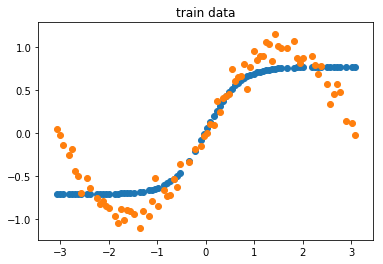

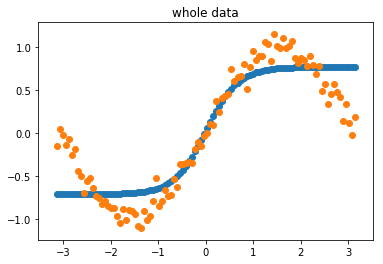

In [8]:
plt.figure()
plt.scatter(X_train, y_train_pred, label='pred')
plt.scatter(X_train, y_train, label='target')
plt.title('train data')
plt.show()

plt.figure()
plt.scatter(X_, y_whole_pred, label='pred')
plt.scatter(X_, y_, label='target')
plt.title('whole data')
plt.show()

## Make model with tf.layers.dense

In [ ]:
tf.reset_default_graph()

# place holder
tf_X = tf.placeholder(tf.float32, [None, 1])
tf_y = tf.placeholder(tf.float32, [None, 1])

# variables





# model

hidden1 = tf.layers.dense(tf_X, 1, activation=tf.nn.sigmoid)
y_pred = tf.layers.dense(hidden1, 1)

# loss and optimizer
loss = tf.losses.mean_squared_error(tf_y, y_pred)
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

In [9]:
with tf.Session() as sess:
    # init
    sess.run(tf.global_variables_initializer())
    
    # train
    for i in range(training_epochs):
        sess.run(optimizer, feed_dict={tf_X:X_train, tf_y:y_train})
        
    # result
    y_train_pred = sess.run(y_pred, feed_dict={tf_X:X_train})
    y_whole_pred = sess.run(y_pred, feed_dict={tf_X:X_})

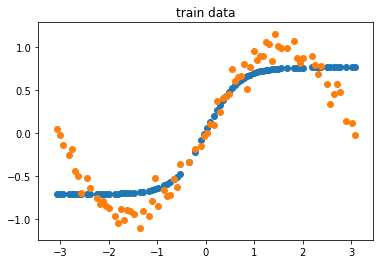

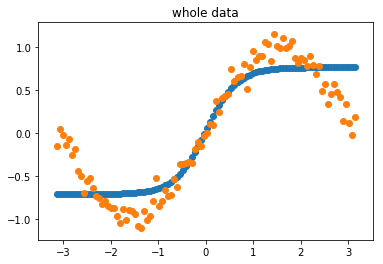

In [10]:
plt.figure()
plt.scatter(X_train, y_train_pred, label='pred')
plt.scatter(X_train, y_train, label='target')
plt.title('train data')
plt.show()

plt.figure()
plt.scatter(X_, y_whole_pred, label='pred')
plt.scatter(X_, y_, label='target')
plt.title('whole data')
plt.show()

## Make model with tf.layers.dense

In [ ]:
tf.reset_default_graph()

# place holder
tf_X = tf.placeholder(tf.float32, [None, 1])
tf_y = tf.placeholder(tf.float32, [None, 1])

# model
hidden1 = tf.layers.dense(tf_X, 1, activation=tf.nn.sigmoid)
y_pred = tf.layers.dense(hidden1, 1)

# loss and optimizer
loss = tf.losses.mean_squared_error(tf_y, y_pred)
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

with tf.Session() as sess:
    # init
    sess.run(tf.global_variables_initializer())
    
    # train
    for i in range(training_epochs):
        sess.run(optimizer, feed_dict={tf_X:X_train, tf_y:y_train})
    
    # result
    y_train_pred = sess.run(y_pred, feed_dict={tf_X:X_train})
    y_whole_pred = sess.run(y_pred, feed_dict={tf_X:X_})

# Plot loss graph

In [13]:
tf.reset_default_graph()

# place holder
tf_X = tf.placeholder(tf.float32, [None, 1])
tf_y = tf.placeholder(tf.float32, [None, 1])

# model
hidden1 = tf.layers.dense(tf_X, 1, activation=tf.nn.sigmoid)
y_pred = tf.layers.dense(hidden1, 1)

# loss and optimizer
loss = tf.losses.mean_squared_error(tf_y, y_pred)
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

with tf.Session() as sess:
    # init
    sess.run(tf.global_variables_initializer())
    
    # train
    losses = []  ### init loss list
    for i in range(training_epochs):
        ### get loss in sess.run
        _, l = sess.run([optimizer, loss], feed_dict={tf_X:X_train, tf_y:y_train})
        losses.append(l)  ### save loss
    
    # result
    y_train_pred = sess.run(y_pred, feed_dict={tf_X:X_train})
    y_whole_pred = sess.run(y_pred, feed_dict={tf_X:X_})    

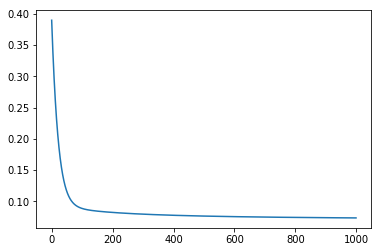

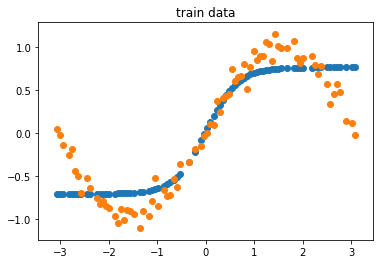

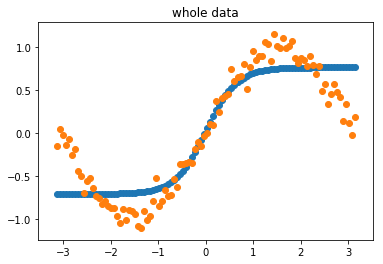

In [14]:
### plot loss
plt.figure()
plt.plot(losses)
plt.show()
            
plt.figure()
plt.scatter(X_train, y_train_pred, label='pred')
plt.scatter(X_train, y_train, label='target')
plt.title('train data')
plt.show()

plt.figure()
plt.scatter(X_, y_whole_pred, label='pred')
plt.scatter(X_, y_, label='target')
plt.title('whole data')
plt.show()

# Change hidden layer's node number

In [17]:
tf.reset_default_graph()

# place holder
tf_X = tf.placeholder(tf.float32, [None, 1])
tf_y = tf.placeholder(tf.float32, [None, 1])

# model
hidden1 = tf.layers.dense(tf_X, 10, activation=tf.nn.sigmoid)  # 1 -> 10
y_pred = tf.layers.dense(hidden1, 1)

# loss and optimizer
loss = tf.losses.mean_squared_error(tf_y, y_pred)
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

with tf.Session() as sess:
    # init
    sess.run(tf.global_variables_initializer())
    
    # train
    losses = []  ### init loss list
    for i in range(training_epochs):
        ### get loss in sess.run
        _, l = sess.run([optimizer, loss], feed_dict={tf_X:X_train, tf_y:y_train})
        losses.append(l)  ### save loss
    
    # result
    y_train_pred = sess.run(y_pred, feed_dict={tf_X:X_train})
    y_whole_pred = sess.run(y_pred, feed_dict={tf_X:X_})    

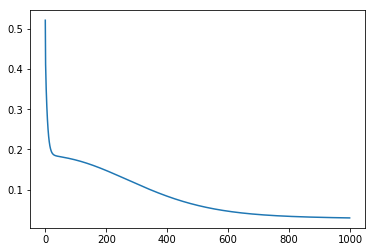

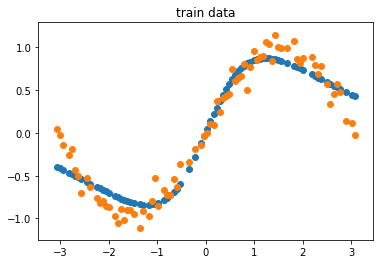

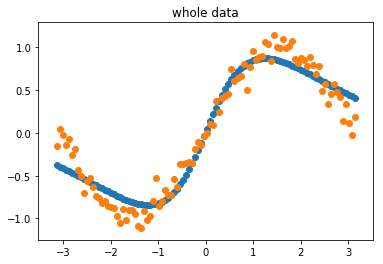

In [18]:
### plot loss
plt.figure()
plt.plot(losses)
plt.show()
            
plt.figure()
plt.scatter(X_train, y_train_pred, label='pred')
plt.scatter(X_train, y_train, label='target')
plt.title('train data')
plt.show()

plt.figure()
plt.scatter(X_, y_whole_pred, label='pred')
plt.scatter(X_, y_, label='target')
plt.title('whole data')
plt.show()

# Change Activation function from simoid to tanh

In [21]:
tf.reset_default_graph()

# place holder
tf_X = tf.placeholder(tf.float32, [None, 1])
tf_y = tf.placeholder(tf.float32, [None, 1])

# model
# 1 -> 10, tf.nn.sigmoid -> tf.nn.tanh
hidden1 = tf.layers.dense(tf_X, 10, activation=tf.nn.tanh)  
y_pred = tf.layers.dense(hidden1, 1)

# loss and optimizer
loss = tf.losses.mean_squared_error(tf_y, y_pred)
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

with tf.Session() as sess:
    # init
    sess.run(tf.global_variables_initializer())
    
    # train
    losses = []  ### init loss list
    for i in range(training_epochs):
        ### get loss in sess.run
        _, l = sess.run([optimizer, loss], feed_dict={tf_X:X_train, tf_y:y_train})
        losses.append(l)  ### save loss
    
    # result
    y_train_pred = sess.run(y_pred, feed_dict={tf_X:X_train})
    y_whole_pred = sess.run(y_pred, feed_dict={tf_X:X_})    

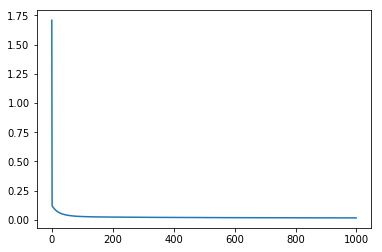

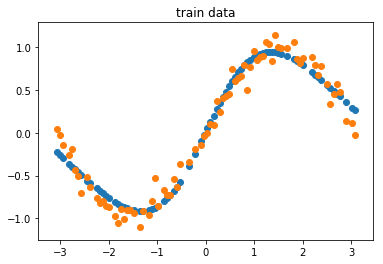

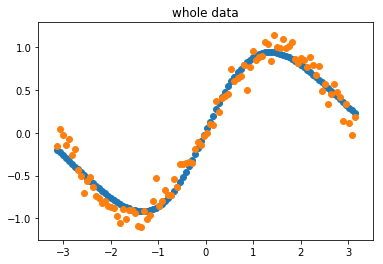

In [22]:
### plot loss
plt.figure()
plt.plot(losses)
plt.show()
            
plt.figure()
plt.scatter(X_train, y_train_pred, label='pred')
plt.scatter(X_train, y_train, label='target')
plt.title('train data')
plt.show()

plt.figure()
plt.scatter(X_, y_whole_pred, label='pred')
plt.scatter(X_, y_, label='target')
plt.title('whole data')
plt.show()

# Sum-up

In [25]:
#################### hyper parameter setting ####################
learning_rate=1e-1
training_epochs = 1000

h = 10 ### number of hidden layer
act = tf.nn.tanh ### activation function
#################################################################
tf.reset_default_graph()

tf_X = tf.placeholder(tf.float32, [None, 1])
tf_y = tf.placeholder(tf.float32, [None, 1])

hidden1 = tf.layers.dense(tf_X, h, activation=act)
y_pred = tf.layers.dense(hidden1, 1)

loss = tf.losses.mean_squared_error(tf_y, y_pred)
optimizer = tf.train.GradientDescentOptimizer(1e-1).minimize(loss)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    losses = [] ### init loss
    for i in range(1000):
        ### get loss
        _, l = sess.run([optimizer, loss], feed_dict={tf_X:X_train, tf_y:y_train})
        losses.append(l)  ### save loss

    y_train_pred = sess.run(y_pred, feed_dict={tf_X:X_train})
    y_whole_pred = sess.run(y_pred, feed_dict={tf_X:X_})        

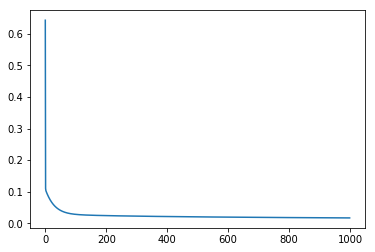

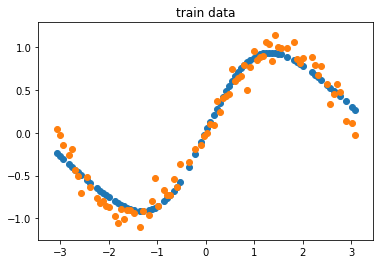

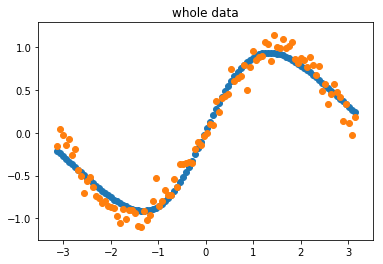

In [26]:
### plot loss
plt.figure()
plt.plot(losses)
plt.show()
            
plt.figure()
plt.scatter(X_train, y_train_pred, label='pred')
plt.scatter(X_train, y_train, label='target')
plt.title('train data')
plt.show()

plt.figure()
plt.scatter(X_, y_whole_pred, label='pred')
plt.scatter(X_, y_, label='target')
plt.title('whole data')
plt.show()